# What this notebook does:

1. Loads raw data

2. Basic Data Exploration

3. Converts data into a form that resembles the input the model will get in the real world

# 1. Setup and Imports

In [4]:
import re

import dill
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set()


# 2. Loading Data

In [5]:
def load_raw_data():
    """Loads and returns raw mental health data from csv file

    Returns:
        pd.DataFrame: Loaded raw car data
    """
    return pd.read_csv('../Data/data_raw.csv')

In [6]:
raw_data = load_raw_data()
raw_data.head()

I am currently employed at least part-time  \
0                                           0   
1                                           1   
2                                           1   
3                                           0   
4                                           1   

   I identify as having a mental illness                Education  \
0                                      0       High School or GED   
1                                      1                 Some Phd   
2                                      0  Completed Undergraduate   
3                                      0       Some Undergraduate   
4                                      1  Completed Undergraduate   

   I have my own computer separate from a smart phone  \
0                                                  0    
1                                                  1    
2                                                  1    
3                                                  1    
4                                                  1    

   I have been hospitalized before for my mental illness  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  1       

   How many days were you hospitalized for your mental illness  \
0                                                0.0             
1                                                0.0             
2                                                0.0             
3                                                NaN             
4                                               35.0             

   I am legally disabled  I have my regular access to the internet  \
0                      0                                         1   
1                      0                                         1   
2                      0                                         1   
3                      0                                         1   
4                      1                                         1   

   I live with my parents  I have a gap in my resume  ...  Obsessive thinking  \
0                       0                          1  ...                 1.0   
1                       0                          0  ...                 0.0   
2                       0                          0  ...                 0.0   
3                       1                          1  ...                 0.0   
4                       0                          1  ...                 1.0   

   Mood swings  Panic attacks  Compulsive behavior  Tiredness    Age  Gender  \
0          0.0            1.0                  0.0        0.0  30-44    Male   
1          0.0            1.0                  0.0        1.0  18-29    Male   
2          0.0            0.0                  0.0        0.0  30-44    Male   
3          0.0            0.0                  0.0        0.0  30-44    Male   
4          1.0            1.0                  1.0        1.0  30-44    Male   

    Household Income              Region               Device Type  
0    $25,000-$49,999            Mountain    Android Phone / Tablet  
1    $50,000-$74,999  East South Central    MacOS Desktop / Laptop  
2  $150,000-$174,999             Pacific    MacOS Desktop / Laptop  
3    $25,000-$49,999         New England  Windows Desktop / Laptop  
4    $25,000-$49,999  East North Central        iOS Phone / Tablet  

[5 rows x 31 columns]

# 3. Basic Data Exploration

In [10]:
# Getting basic stats on numeric columns:
raw_data.describe()

I am currently employed at least part-time  \
count                                  334.000000   
mean                                     0.679641   
std                                      0.467315   
min                                      0.000000   
25%                                      0.000000   
50%                                      1.000000   
75%                                      1.000000   
max                                      1.000000   

       I identify as having a mental illness  \
count                             334.000000   
mean                                0.239521   
std                                 0.427431   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                 1.000000   

       I have my own computer separate from a smart phone  \
count                                         334.000000    
mean                                            0.874251    
std                                             0.332063    
min                                             0.000000    
25%                                             1.000000    
50%                                             1.000000    
75%                                             1.000000    
max                                             1.000000    

       I have been hospitalized before for my mental illness  \
count                                         334.000000       
mean                                            0.077844       
std                                             0.268328       
min                                             0.000000       
25%                                             0.000000       
50%                                             0.000000       
75%                                             0.000000       
max                                             1.000000       

       How many days were you hospitalized for your mental illness  \
count                                         297.000000             
mean                                            3.276094             
std                                            14.126045             
min                                             0.000000             
25%                                             0.000000             
50%                                             0.000000             
75%                                             0.000000             
max                                           100.000000             

       I am legally disabled  I have my regular access to the internet  \
count             334.000000                                334.000000   
mean                0.098802                                  0.964072   
std                 0.298844                                  0.186390   
min                 0.000000                                  0.000000   
25%                 0.000000                                  1.000000   
50%                 0.000000                                  1.000000   
75%                 0.000000                                  1.000000   
max                 1.000000                                  1.000000   

       I live with my parents  I have a gap in my resume  \
count              334.000000                 334.000000   
mean                 0.110778                   0.245509   
std                  0.314328                   0.431034   
min                  0.000000                   0.000000   
25%                  0.000000                   0.000000   
50%                  0.000000                   0.000000   
75%                  0.000000                   0.000000   
max                  1.000000                   1.000000   

       Total length of any gaps in my resume in months.  ...  \
count                                        334.000000  ...   
me

In [11]:
# Getting info on data types and null values:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    334 non-null    int64  
 1   I identify as having a mental illness                         334 non-null    int64  
 2   Education                                                     334 non-null    object 
 3   I have my own computer separate from a smart phone            334 non-null    int64  
 4   I have been hospitalized before for my mental illness         334 non-null    int64  
 5   How many days were you hospitalized for your mental illness   297 non-null    float64
 6   I am legally disabled                                         334 non-null    int64  
 7   I have my regular access to the internet                      334 non-n

In [12]:
# Getting null values in each column:
raw_data.isnull().sum()

I am currently employed at least part-time                       0
I identify as having a mental illness                            0
Education                                                        0
I have my own computer separate from a smart phone               0
I have been hospitalized before for my mental illness            0
How many days were you hospitalized for your mental illness     37
I am legally disabled                                            0
I have my regular access to the internet                         0
I live with my parents                                           0
I have a gap in my resume                                        0
Total length of any gaps in my resume in months.                 0
Annual income (including any social welfare programs) in USD     0
I am unemployed                                                  0
I read outside of work and school                                0
Annual income from social welfare programs                    

In [13]:
raw_data.shape

(334, 31)

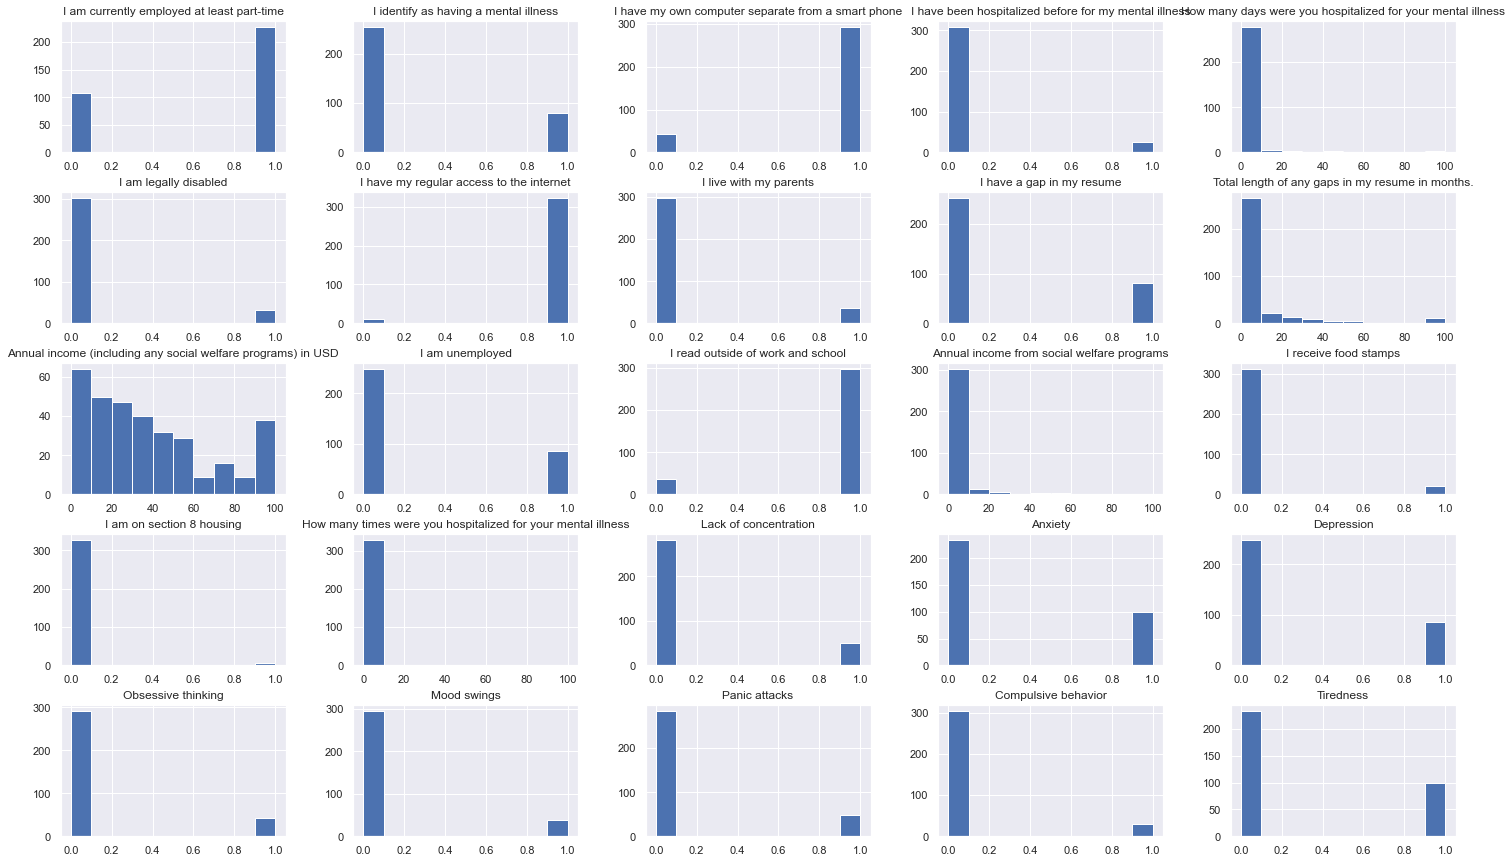

In [16]:
raw_data.hist(figsize=(25, 15))
plt.show()

In [17]:
profile = ProfileReport(raw_data, title="Pandas Profiling Report", explorative=True)
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:04<00:00,  4.69s/it]


In [18]:
profile.to_file("../Reports/report_raw.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 30.31it/s]


# Processing